In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it
from random import randint

turmas = pd.read_csv('turmas.csv')
# Retira as turmas não atendidas
turmas = turmas[turmas["Situação"] == "Atendida"]
# Reseta os índices do dataFrame
turmas = turmas.reset_index().drop('index',axis=1)
# Formata a coluna Horário para retirar a data. Ex: "24T12 (1/1/2018 - 12/12/2018)" -> "24T12"
turmas['Horário'] = turmas['Horário'].str.split(expand=True)[0]

In [2]:
turmas.head()

,Ano-Período,Componente,Tipo,Situação,Horário,Vagas
0,2018-2,DBQ0050 - BIOINFORMÁTICA ESTRUTURAL,Turma Regular,Atendida,35T12,20
1,2018-2,DIM0114 - BANCO DE DADOS,Turma Regular,Atendida,24M34,10
2,2018-2,DIM0117 - ESTRUTURAS DE DADOS BÁSICAS II,Turma Regular,Atendida,35M34,1
3,2018-2,DIM0119 - ESTRUTURA DE DADOS BÁSICAS I,Turma Regular,Atendida,35M12,1
4,2018-2,DIM0120 - LINGUAGEM DE PROGRAMAÇÃO I,Turma Regular,Atendida,35M56,1


## Função para verificar compatibilidade de horários

In [3]:
''' Compara se dois horários tem mesmo turno '''
def comp_t(hor1, hor2):
    turno = ['M','T','N']
    comp_turno = False
    for t in turno:
        h1 = hor1.find(t)
        h2 = hor2.find(t)
        if (h1 > 0 and h2 > 0):
            return t
    return 'F'

''' Compara se há confilto entre horários '''
def comp(hor1, hor2):
    turno = comp_t(hor1, hor2)
    if (turno == 'F'):
        return False
    
    w1, h1 = hor1.split(turno)
    w2, h2 = hor2.split(turno)
    
    for d1 in w1:
        if (d1 in w2):
            for h in h1:
                if(h in h2):
                    return True
    return False


In [4]:
g = nx.Graph()
#for i in range()
#for h1 in turmas['Horário']:
#    for h2 in turmas['Horário']
n = len(turmas['Horário'])
for i in range(n):
    for j in range(i, n):
        if ((turmas['Horário'][i] != turmas['Horário'][j]) and comp(turmas['Horário'][i], turmas['Horário'][j])):
            g.add_edge(i, j)


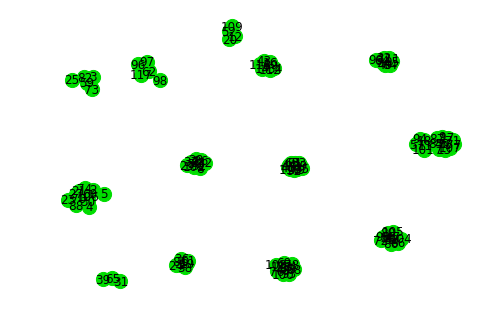

In [5]:
nx.draw(g, with_labels=True, edge_color='skyblue', node_size=200, node_color='#00dd00')
plt.draw()

In [6]:
turmas['cor'] = [-1 for i in range(len(turmas))] # Inicia todos sem cor
turmas['dsat'] = [0 for i in range(len(turmas))] # Inicia todos sem cor
#turmas.loc[[10],['cor']] = 'yellow'

ValueError: c of shape (118,) not acceptable as a color sequence for x with size 111, y with size 111

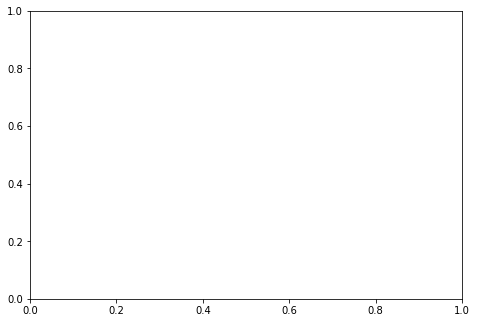

In [7]:
nx.draw(g, with_labels=True, edge_color='skyblue', node_size=200, node_color=turmas['cor'])
plt.draw()

In [ ]:
nx.draw_random(g)

In [ ]:
nx.draw_kamada_kawai(g)

In [ ]:
result = nx.greedy_color(g, strategy='DSATUR', interchange=False)

# Nosso algoritmo de DSATUR

In [ ]:
degrees = [v for range(len(turmas['']))]

def update_dsat(g, node):
    counter = set()
    neighbors = list(g.neighbors(node))
    for neigh in neighbors:
        if turmas['cor'][neigh] != -1:
            counter.add(turmas['cor'][neigh])
    turmas['dsat'][node] = len(counter)

def get_greatest_satured_degree_not_colored(g, great):
    max_dsat = int((turmas[turmas['cor'] == -1].sort_values(by='dsat')).tail(1)['dsat'])
    # (turmas[turmas['cor'] == -1].sort_values(by='dsat'))['dsat']
    #.tail(1).index.values[0]
    turmas[turmas['dsat'] == max_dsat]

def next_color(great, coloration):
    # TODO
    pass

In [ ]:
def dsatur(g):
    #Coloration *coloration = new Coloration();
    coloration = []
    count = g.order()
    nbdg = sorted(list(g.degree()), key=lambda x : x[1])
    great = nbdg.pop()
    coloration.append((0, great))
    turmas['cor'][great[0]] = 0
    count-=1
    while count > 0:
        n = list(g.neighbors(great[0]))
        for neigh in n:
            if turmas['cor'][neigh] == -1:
                update_dsat(g, neigh)

        great = get_greatest_satured_degree_not_colored(g, great)

        color = next_color(great, coloration)

        coloration.append((color, great))
        turmas['cor'][great[0]] = color
        count-=1

    return coloration

In [ ]:
r = dsatur(g)

In [ ]:
co = ['#{0:0{1}x}'.format(randint(0,10000)*r.get(i),6) for i in g.nodes]
for i in range(len(turmas)):
    turmas.loc[i,['cor']] = co[i]

In [ ]:
nx.draw(g, with_labels=True, edge_color='skyblue', node_size=200, node_color=turmas['cor'])
plt.draw()

In [ ]:
max_dsat = int((turmas[turmas['cor'] == -1].sort_values(by='dsat')).tail(1)['dsat'])
list(turmas[turmas['dsat'] == max_dsat].index)

In [10]:
list(g.nodes())

[1,
 24,
 36,
 38,
 61,
 81,
 2,
 60,
 106,
 3,
 59,
 4,
 5,
 6,
 14,
 16,
 19,
 34,
 43,
 112,
 115,
 7,
 45,
 58,
 85,
 8,
 37,
 42,
 50,
 51,
 83,
 102,
 9,
 10,
 11,
 57,
 12,
 20,
 52,
 109,
 13,
 17,
 18,
 21,
 23,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 65,
 32,
 54,
 64,
 84,
 95,
 99,
 111,
 33,
 53,
 63,
 79,
 89,
 91,
 92,
 116,
 35,
 39,
 40,
 41,
 44,
 71,
 77,
 87,
 107,
 46,
 66,
 72,
 80,
 86,
 90,
 104,
 105,
 47,
 48,
 68,
 69,
 76,
 78,
 93,
 100,
 103,
 49,
 55,
 56,
 94,
 101,
 73,
 82,
 70,
 74,
 62,
 96,
 97,
 98,
 117,
 113,
 114,
 88]